In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

In [2]:
import sys
if "../src/" not in sys.path:
    sys.path.insert(0,"../src/")
from pbcpy.grid import DirectGrid, ReciprocalGrid
from pbcpy.field import DirectField, ReciprocalField
from pbcpy.functionals import *
from pbcpy.local_functionals_utils import x_TF_y_vW 
from pbcpy.nonlocal_functionals_utils import LindhardFunction, MGP_kernel, WT_kernel
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF

%matplotlib inline
%load_ext autoreload
%autoreload 2
#

In [3]:
mol = PP(filepp='Al_fde_rho.pp').read()

In [4]:
density_real_space = mol.field

# Local and Semilocal Functionals energy and potential

In [5]:
TFvW = x_TF_y_vW(density_real_space,x=1,y=1,Sigma=0.05)

# Nonlocal Functionals energy and potential

In [6]:
rho0=density_real_space.integral() / density_real_space.grid.volume
print(rho0)

0.0268476949077


In [7]:
rho0=np.real(density_real_space.fft()[0,0,0,0] / density_real_space.grid.volume)
print(rho0)

0.0268476949077


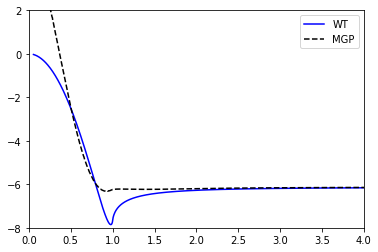

In [8]:
#
# Cute-looking kernels
#
q=np.linspace(0.1,8,1000)
gmpker = MGP_kernel(q,rho0,0.3,500)
wtker = WT_kernel(q,rho0)
eta = q/(2.0 * (3.0 * rho0 * np.pi**2)**(1.0/3.0))
plt.plot(eta,wtker,color='blue',label='WT')
plt.plot(eta,gmpker,label='MGP',color='black',linestyle='--')
plt.xlim(0,4)
plt.ylim(-8,2)
plt.legend()
#plt.savefig("./kernels_comparison.pdf")
plt.show()

In [9]:
q = np.sqrt(density_real_space.grid.get_reciprocal().gg)

In [10]:
wtker = WT_kernel(q,rho0)

In [11]:
#WTdens = dens_real_space.energy_density(kernel=wtker,a=(5.0/6.0),b=(5.0/6.0),c=1.0)
rhofs = density_real_space**(5.0/6.0)
rhofs_g = rhofs.fft()
rhofs_kernel = WT_kernel(q,rho0)*rhofs_g


In [12]:
WT_edens = rhofs_kernel.ifft(force_real=True)*rhofs 

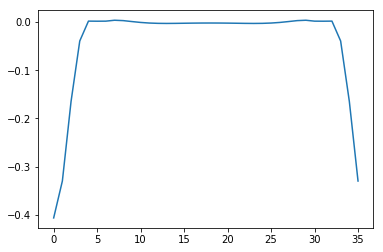

In [13]:
plt.plot(WT_edens[:,0,0,0])
plt.show()

In [14]:
rhoos = density_real_space**(-1.0/6.0)

In [15]:
WT_pot = (5.0/6.0)*2.0* rhoos * rhofs_kernel.ifft(force_real=True)

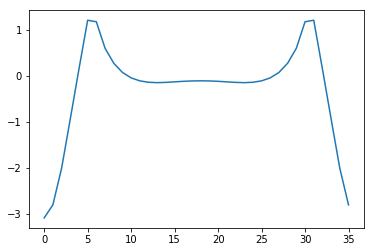

In [16]:
plt.plot(WT_pot[:,0,0,0])
plt.show()

In [17]:
WT_NL_Functional = Functional( energydensity=WT_edens, potential=WT_pot,kernel=WT_kernel(q,rho0))

In [33]:
WT = WT_NL_Functional.sum(x_TF_y_vW(x=1.0,y=1.0,rho=density_real_space,Sigma=0.15))

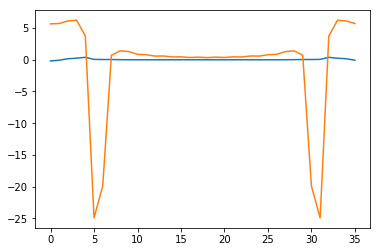

In [34]:
plt.plot(WT.energydensity[:,0,0,0])
plt.plot(WT.potential[:,0,0,0])
plt.show()

In [36]:
WT.energydensity.integral()*27.211385

79.312187821903379

In [37]:
WT_NL_Functional.energydensity.integral()*27.211385

-5.501165471606706